In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

csv_path = 'C:/Users/in/Desktop/Resource_Management_Process.csv'
df = pd.read_csv(csv_path)
df

,Datetime,Production,Temperature,Humidity,Power_Cost,DoW,Worker_Power,Man_Cost,Power_Usage
0,2021-02-08 0:15,116,-4.2,65.6,109.8,Monday,0.13,1.5,103
1,2021-02-08 0:30,116,-4.2,63.5,109.8,Monday,0.13,1.5,100
2,2021-02-08 0:45,114,-4.2,67.6,109.8,Monday,0.14,1.5,109
3,2021-02-08 1:00,114,-5.5,72.8,109.8,Monday,0.13,1.5,161
4,2021-02-08 1:15,116,-5.5,67.4,109.8,Monday,0.15,1.5,136
...,...,...,...,...,...,...,...,...,...
24474,2021-10-21 22:45,129,23.6,74.0,167.2,Thursday,0.30,1.5,162
24475,2021-10-21 23:00,217,22.5,74.6,167.2,Thursday,1.07,1.5,134
24476,2021-10-21 23:15,217,22.2,71.3,167.2,Thursday,1.05,1.5,157
24477,2021-10-21 23:30,213,23.1,72.7,167.2,Thursday,1.05,1.5,163


In [2]:
df.describe()

,Production,Temperature,Humidity,Power_Cost,Worker_Power,Man_Cost,Power_Usage
count,24479.000000,24479.000000,24479.000000,24479.000000,24479.000000,24479.000000,24479.000000
mean,231.557988,16.332203,63.231562,162.533135,1.042010,1.312492,136.468238
std,214.886001,9.679980,24.224441,30.831938,1.989461,0.242068,58.113685
min,112.000000,-13.700000,-2.000000,109.800000,0.120000,1.000000,39.000000
25%,114.000000,9.500000,45.600000,167.200000,0.140000,1.000000,68.000000
50%,126.000000,17.800000,67.400000,167.200000,0.250000,1.500000,147.000000
75%,276.000000,24.100000,84.900000,191.600000,1.310000,1.500000,186.000000
max,2573.000000,36.000000,97.000000,191.600000,48.530000,1.500000,270.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

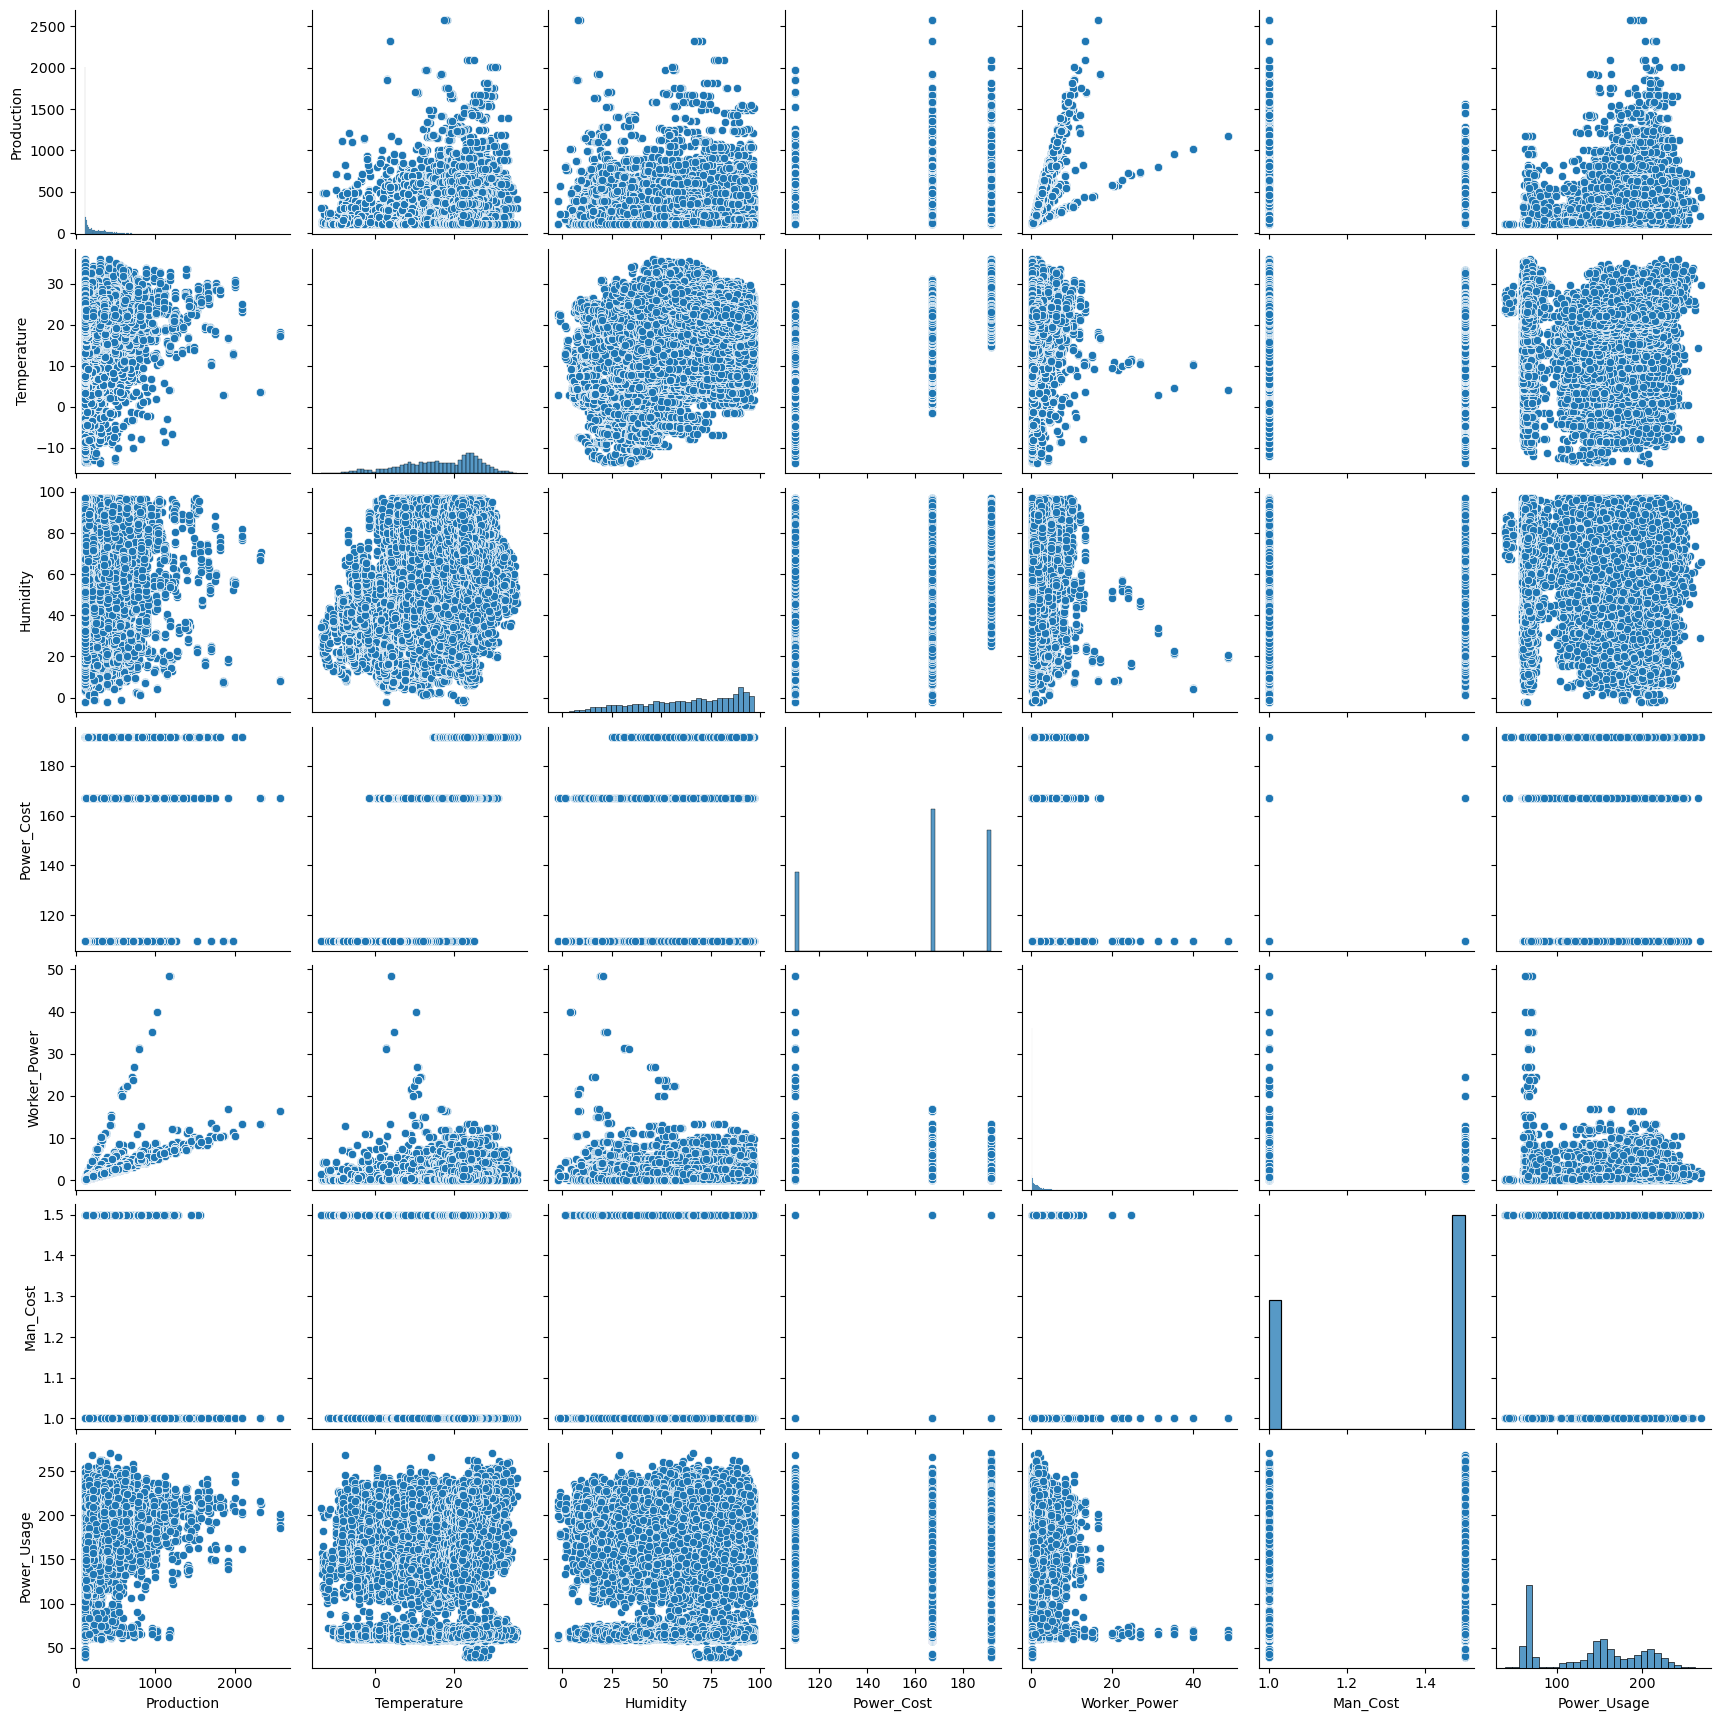

In [3]:
sns.pairplot(df[['Production', 'Temperature', 'Humidity', 'Power_Cost', 'DoW', 'Worker_Power', 'Man_Cost', 'Power_Usage']])
plt.show()

In [11]:
from statsmodels.formula.api import ols
model1 = ols('Power_Usage ~ Production+Temperature+Humidity+Power_Cost+DoW+Worker_Power', data=df).fit()
model2 = ols('Man_Cost ~ Production+Temperature+Humidity+Power_Cost+DoW+Worker_Power', data=df).fit()
print(model1.summary())
# print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            Power_Usage   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     1332.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:43:29   Log-Likelihood:            -1.2843e+05
No. Observations:               24479   AIC:                         2.569e+05
Df Residuals:                   24467   BIC:                         2.570e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           94.8122      2.223  

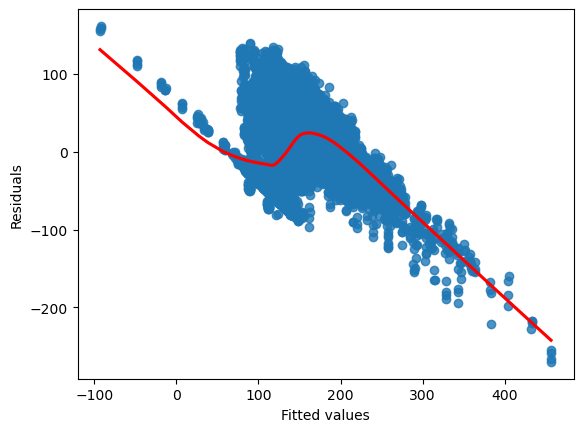

In [14]:
#선형성
residuals = model1.resid
fitted = model1.fittedvalues

sns.regplot(x=fitted, y=residuals, lowess=True, line_kws={'color':'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# #정규성
# sm.qqplot(residuals, line=' q ', fit=Ture)
# plt.show()
# shapiro_test = stats.shapiro(residuals)
# print(f'Shapiro statistic: {shapiro_test[0]}, p-values:{shapiro_test[1]}')

# #등분산성
# sr = scipy.stats.zscore(residuals)
# sns.regplot(x=fitted, y=np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red'})
# plt.xlabel('Fitted values')
# plt.ylabel('Square Root of Absolute Standardized Residuals')
# plt.show()

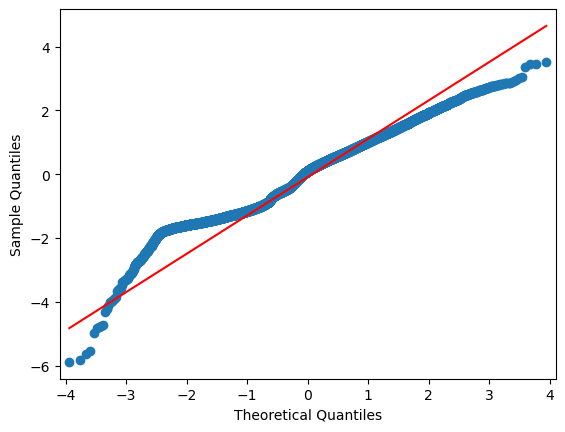

Shapiro statistic: 0.9806170463562012, p-values: 0.0


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [15]:
import statsmodels.api as sm
from scipy import stats
# 정규성
sm.qqplot(residuals, line='q', fit=True)
plt.show()
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro statistic: {shapiro_test[0]}, p-values: {shapiro_test[1]}')

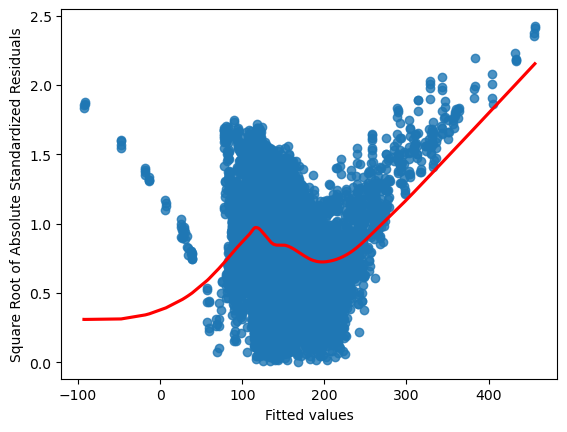

In [16]:
import scipy.stats
# 등분산성
sr = scipy.stats.zscore(residuals)
sns.regplot(x=fitted, y=np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red'})
plt.xlabel('Fitted values')
plt.ylabel('Square Root of Absolute Standardized Residuals')
plt.show()